### Student Information
Name:劉明捷

Student ID:114033632

GitHub ID:JackLiu1208

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Second

In [87]:
### Begin Assignment Here
# envirronment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import sys
print(sys.executable) # my pipenv path
print(sys.version) #3.11.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
d:\nthu_class\data_mining_labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


### Data Preparation

In [88]:
# use pandas to read csv file
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

In [89]:
df.head(7)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0


In [90]:
print(df.columns)
df.info()

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non

In [91]:
for t in df["text"][:3]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.


In [92]:
df.loc[:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


In [93]:
# ex2 swap the columns
df2 = df.copy() # use copy to avoid modifying original df
df2[['datetime','type']] = df2[['type', 'datetime']]
df2.loc[:3]
# compare with original df
# the data in the two columns are swapped

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,2025-04-11 17:29:56,comment,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,2025-04-12 1:12:19,comment,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,2025-04-10 15:09:41,comment,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,2023-08-30 17:12:55,post,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


In [94]:
# EX3 find out specific number or type in a column
df[df["label"] == 1.0][::16][:3] # 顯示前 3 個 label = 1 的data的 16 個columes

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
118,comment,2025-04-10 15:31:57,mmejc27,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,mealucra,https://www.reddit.com/r/stocks/comments/1jvzr...,1,NaN,NaN,Yikes...\r\n\r\n\r\nThis shitshow continually ...,0.763889,-0.266667,-1.0,"['shitshow', 'spine', 'drumpf', 'news', 'rabid...",1.0
254,comment,2025-04-11 14:06:57,mmkczab,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,Findest,https://i.redd.it/uajqu4kxl7ue1.png,3,NaN,NaN,Perfect some might say.,1.000000,1.000000,1.0,['Perfect'],1.0


### Data mining
#### mising value

In [95]:
print(df.isnull().sum()) # check missing value in each column
# print(df.isnull())
## 從結果可以看到在 downvotes, upvotes_ratio 兩個欄位有缺失值

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64


In [96]:
# EX4
df.isnull().apply(lambda df: dmh.check_missing_values(df),axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

#### duplicate data

In [97]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [98]:
df.drop_duplicates(keep=False, inplace=True) # drop all duplicates
len(df)

847

### Data preprocessing

#### sampling

In [99]:
df_sample = df.sample(n = 500, random_state = 42) # sample 500 data from df
df_sample[0:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
457,comment,2025-04-11 15:42:58,mmkwda9,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,IamNotaMonkeyRobot,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,"""We"" who?",0.00,0.0,0.0,[],0.0
342,comment,2025-04-12 3:04:05,mmob98a,wallstreetbets,Retail giant TARGET has now declined for 10 co...,iPlayedHockeInHS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,Chicken jockey,0.95,-0.6,-1.0,"['jockey', 'Chicken']",0.0
280,comment,2025-04-10 14:40:26,mme8wxn,StockMarket,How do you feel about a sitting president maki...,Narradisall,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Not great Bob,0.75,0.8,1.0,['Bob'],-1.0


<Axes: title={'center': 'Bar chart of label'}, xlabel='type', ylabel='count'>

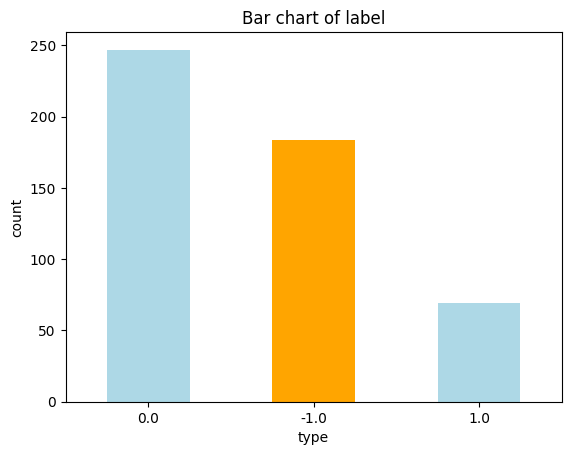

In [100]:
# EX7 bar chart
df_sample.label.value_counts().plot(kind='bar'
    , title='Bar chart of label'
    , xlabel='type'
    , ylabel='count'
    , color=['lightblue', 'orange']
    , rot=0)

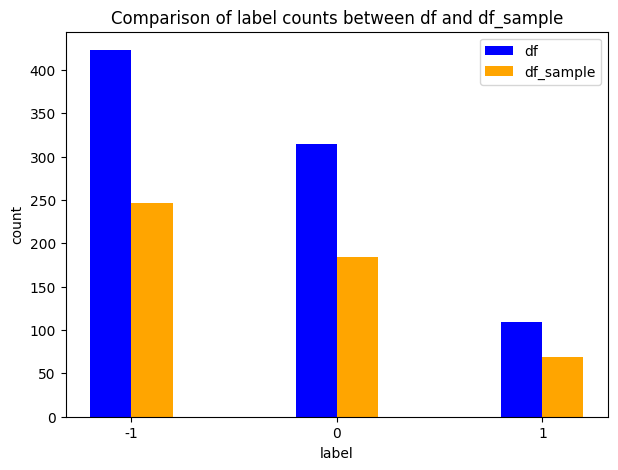

In [101]:
# EX8 camparison between df and df_sample
bar_width = 0.2 # width of each bar
df_index = np.arange(-1,2,1)
fig ,ax = plt.subplots(figsize=(7,5))
ax.bar(df_index, df.label.value_counts(), bar_width, label='df', color='blue') # first bar(df)
ax.bar(df_index + bar_width, df_sample.label.value_counts(), bar_width, label='df_sample', color='orange') # second bar(df_sample)
ax.set_xlabel('label')
ax.set_ylabel('count')
ax.set_title('Comparison of label counts between df and df_sample')
ax.set_xticks(df_index + bar_width / 2)
ax.set_xticklabels(['-1', '0', '1'])
ax.legend()
plt.show()

#### feature subset selection

In [102]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_count = count_vect.fit_transform(df['text'])
print(df_count[1])

  (np.int32(0), np.int32(3696))	1
  (np.int32(0), np.int32(388))	1
  (np.int32(0), np.int32(2024))	2
  (np.int32(0), np.int32(2310))	1
  (np.int32(0), np.int32(4244))	1
  (np.int32(0), np.int32(1168))	1
  (np.int32(0), np.int32(3858))	1
  (np.int32(0), np.int32(1409))	1
  (np.int32(0), np.int32(2402))	1
  (np.int32(0), np.int32(538))	1
  (np.int32(0), np.int32(1083))	1
  (np.int32(0), np.int32(175))	2
  (np.int32(0), np.int32(3628))	1
  (np.int32(0), np.int32(2161))	1
  (np.int32(0), np.int32(3848))	1
  (np.int32(0), np.int32(1568))	1
  (np.int32(0), np.int32(2878))	1
  (np.int32(0), np.int32(2645))	1
  (np.int32(0), np.int32(887))	1
  (np.int32(0), np.int32(3477))	1
  (np.int32(0), np.int32(1412))	2
  (np.int32(0), np.int32(3795))	1
  (np.int32(0), np.int32(2918))	1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [103]:
analyze = count_vect.build_analyzer()
print(analyze(df['text'][1]))

['stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', 'no', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever']


In [104]:
analyze(df['text'][1])

['stunt',
 'as',
 'in',
 'like',
 'why',
 'did',
 'they',
 'even',
 'make',
 'big',
 'deal',
 'about',
 'starting',
 'it',
 'in',
 'the',
 'first',
 'place',
 'no',
 'company',
 'should',
 'ever',
 'talk',
 'about',
 'politics',
 'ever']

In [105]:
df_count.shape

(847, 4346)

In [106]:
# EX10 find out where the non-zero elements are
row, col = df_count[:50,:500].toarray().nonzero()
print(row)
print(col)
count_vect.get_feature_names_out()[col[0]]

[ 1  1  3  3  3  3  3  3  3  3  3  3  6  6  6  6  6  7  8  8  8  9  9  9
 13 13 13 13 13 13 14 17 17 17 17 17 18 19 19 19 19 19 19 19 19 19 19 19
 19 23 23 23 23 23 23 25 27 30 30 30 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 34 34 35 35
 35 35 36 36 38 39 39 39 40 40 40 41 42 42 44 44 44 44 45 46 46 47 47 49
 49]
[175 388  18 175 195 196 197 320 327 404 406 486 225 289 327 374 486 496
 133 305 473   8 327 497   8  29  77 100 346 496 499 327 343 388 486 492
 327 213 301 305 314 320 327 342 374 388 400 406 486 278 327 374 383 406
 453 473 346 176 320 441   1   9  22  38  66  80  88  90  97 100 118 149
 213 220 221 248 289 313 327 330 341 347 374 385 387 388 406 446 474 486
 487 497 374 448  61 175 327 444 303 327 486 289 346 406 230 274 374 327
 374 448  56  81 304 327   9 175 450 158 406 327 374]


'about'

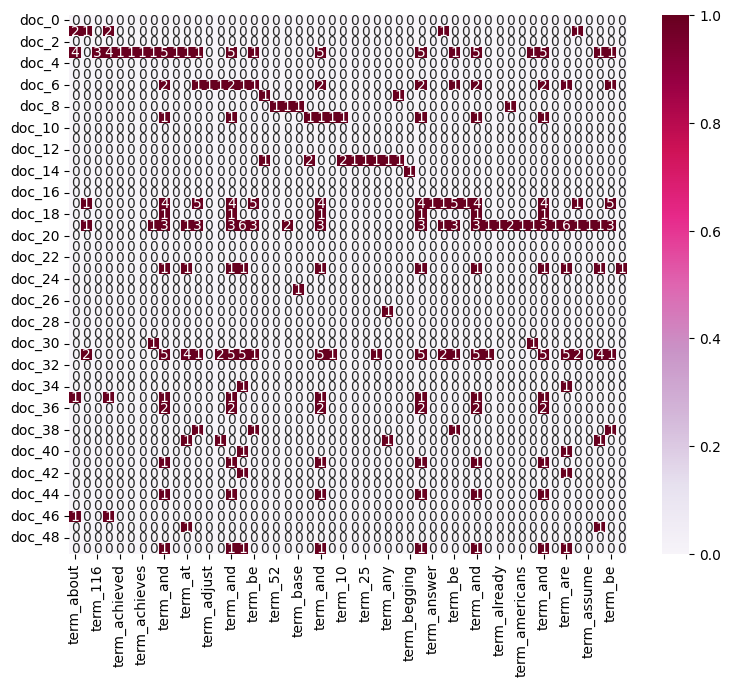

In [107]:
# EX11 使用.nonzero()找出前50筆文件中，所有出現過的前20個大於等於1的term有哪些及其index，並繪製成heatmap
row, col = df_count[:50,:500].toarray().nonzero()
# 設定heatmap的x,y軸及z值
# 只取前50個term來畫圖
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[col[0:50]]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:50]]
plot_z = df_count[0:50, col[0:50]].toarray() 
# draw heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Attribute Transformation / Aggregation

In [108]:
term_freq = []
for i in range(0, df_count.shape[1]):
    term_freq.append(sum(df_count[:,i]).toarray())
term_freq = np.asarray(df_count.sum(axis=0))[0]
term_freq[0]

np.int64(4)

In [109]:
# EX12 use poltly to draw the term frequency distribution
term_freq_df = pd.DataFrame({'term': count_vect.get_feature_names_out()[:300], 'frequency': term_freq[:300]})
fig = px.bar(term_freq_df, x='term', y='frequency', title='First 300 terms frequency distribution')
fig.show()

In [110]:
# EX13 選擇一定出現頻率以上的顯示
df_index = np.where(term_freq >= 5)[0] # 5只是個範例，可以根據需求調整
term_freq_df = pd.DataFrame({'term': count_vect.get_feature_names_out()[df_index], 'frequency': term_freq[df_index]})
fig = px.bar(term_freq_df, x='term', y='frequency', title='term frequency >= 5')
fig.show()

In [111]:
# EX14 按大小排列並做長尾曲線圖
df_index = np.where(term_freq >= 10)[0] # 10只是個範例，可以根據需求調整
term_freq_df = pd.DataFrame({'term': count_vect.get_feature_names_out()[df_index], 'frequency': term_freq[df_index]})
term_freq_df = term_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
# 定義分界點
head_tail_point = int(len(term_freq_df) * 0.1)  # 例如前10%為head
fig = go.Figure()
# draw head and tail with different colors
# head: lightgreen, blue line
fig.add_trace(go.Scatter(x=term_freq_df['term'][:head_tail_point], 
                         y=term_freq_df['frequency'][:head_tail_point],
                         mode='lines',
                         fill='tozeroy',
                         fillcolor='lightgreen',
                         name='Head (Top 10%)',
                         marker=dict(color='blue', size=8)))
# tail: yellow, orange line
fig.add_trace(go.Scatter(x=term_freq_df['term'][head_tail_point-1:],
                         y=term_freq_df['frequency'][head_tail_point-1:],
                         mode='lines',
                         fill='tozeroy',
                         fillcolor='yellow',
                         name='Tail (Bottom 90%)',
                         marker=dict(color='orange', size=6, opacity=0.5)))
fig.update_layout(title='Term Frequencies for Terms Appearing at least 5 times',
                  xaxis_title='Terms', yaxis_title='Frequencies', xaxis_tickangle=-90)
fig.show()

In [112]:
# ex15
term_freq_log =np.array([math.log(freq) if freq > 0 else 0 for freq in term_freq])
df_index = np.where(term_freq >= 10)[0] # 1000只是個範例，可以根據需求調整
term_freq_df = pd.DataFrame({'term': count_vect.get_feature_names_out()[df_index], 'frequency': term_freq_log[df_index]})
term_freq_df = term_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
# 定義分界點
head_tail_point = int(len(term_freq_df) * 0.1)  # 例如前10%為head
fig = go.Figure()
fig.add_trace(go.Scatter(x=term_freq_df['term'][:head_tail_point], 
                         y=term_freq_df['frequency'][:head_tail_point],
                         mode='lines',
                         fill='tozeroy',
                         fillcolor='lightgreen',
                         name='Head (Top 10%)',
                         marker=dict(color='blue', size=8)))
fig.add_trace(go.Scatter(x=term_freq_df['term'][head_tail_point-1:],
                         y=term_freq_df['frequency'][head_tail_point-1:],
                         mode='lines',
                         fill='tozeroy',
                         fillcolor='yellow',
                         name='Tail (Bottom 90%)',
                         marker=dict(color='orange', size=6, opacity=0.5)))
fig.update_layout(title='Term Frequencies for Terms Appearing at least 5 times',
                  xaxis_title='Terms', yaxis_title='Frequencies', xaxis_tickangle=-90)
fig.show()


## Third

### Pie Chart

In [113]:
# 圓餅圖 label 的占比
label_counts = df['label'].value_counts()
label_counts[:]
# 資料準備
category =['Neutral', 'Negative' , 'Positive']
value = label_counts.values
# 繪圖
fig = go.Figure(data=[go.Pie(labels=category, values=value, hole=.4)])
fig.update_traces(textposition='inside', textinfo='percent+label')

In [114]:
# 圓餅圖 type 的占比
type_counts = df['type'].value_counts()
print(type_counts[:])
# 資料準備
category = type_counts.index.tolist()
value = type_counts.values
# 繪圖
fig = go.Figure(data=[go.Pie(labels=category, values=value, hole=.4)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

type
comment    783
post        64
Name: count, dtype: int64


### Time Series distribution of type and label

In [115]:
# 根據datetime繪製type和label的時間序列分佈圖
datetime_df = pd.DataFrame({'datetime' : df.datetime, 'type': df.type, 'label': df.label})
datetime_df = datetime_df.sort_values(by='datetime', ascending=False).reset_index(drop=True)
fig = px.scatter(datetime_df, x='datetime', y='type', color='label', title='Time Series of Type and Label', labels={'type': 'Type', 'label': 'Label'})
fig.show()

# Phase 2

### data preprocess

In [116]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['label'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['label'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [117]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category -1.0:


,000,02,03,10,100,1000,10000,11,12,13,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category -1.0 we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category 0.0 we filter the following words:
Bottom 1.0% words: 
186         1
18630       1
1870        1
1k          1
1m          1
2028        1
yahoo       1
yall        1
yea         1
worked      1
2045        1
208         1
21          1
22rate      1
23          1
234         1
2012        1
2017        1
20211209    1
14          1
14

,000,02,03,10,100,1000,10000,11,12,13,...,ya,yea,yeah,year,years,yet,yields,yippee,yo,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'UTF-8'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

In [120]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = str(int(category))    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1) # Specify the output file name and threshold


In [121]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj = alg.FPGrowth(iFile='td_freq_db_-1.csv', minSup=minSup)
obj.mine()
frequentPatternsDF__1= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF__1))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 21
Runtime: 0.01915574073791504


In [122]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_0.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_0= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_0))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 19
Runtime: 0.018152952194213867


In [123]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_1.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_1= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_1))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.0165865421295166


In [124]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
label_dfs = [frequentPatternsDF__1, frequentPatternsDF_0, frequentPatternsDF_1]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for label_df in label_dfs:
    for pattern in label_df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1} # 找到只出現一次的pattern
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(label_df) for label_df in label_dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for label_df in label_dfs:
    filtered_df = label_df[label_df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns Support
19    after      11
18  already      11
11   things      10
36     most      10
35      let      10
17    again      10
16      bad      10
15   should      10
14     sure      10
13      day      10
12     here      10
37       go      10
10    great       9
9      into       9
2       off       9
3     seems       9
34      few       9
33       am       9
32       ll       9
31   weekly       9
30    still       9
29     long       9
28   reddit       9
27      own       9
26      way       9
25     news       9
24    every       9
23      got       9
22     said       9
21     cash       9
20  looking       9
1     right       9
4      want       9
5      same       9
6      last       9
7   america       9
8      week       9
0       end       9
Number of patterns discarded: 2


In [125]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['text'])  # df['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,said,cash,looking,right,want,same,last,america,week,end
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> Exercise 17

In [126]:
# Answer Here
import pandas as pd
from PAMI.frequentPattern.topk import FAE as alg1
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg2

top_K = [10, 100, 200]
minSup = [3, 6, 9]
label_type = 0 # [-1, 0, 1]
for k in top_K:
    obj5 = alg1.FAE(iFile=f"td_freq_db_{label_type}.csv", k=k, sep='\t')
    obj5.mine()
    obj5.save(f"freq_patterns_{label_type}_k{k}.txt")
    frequentPatternsDF_0 = obj5.getPatternsAsDataFrame()
    print(f"k = {k}, categary : {label_type}")
    print(f"Total No of pattern: " + str(len(frequentPatternsDF_0)))
    print('Runtime: ' + str(obj5.getRuntime()))
for sup in minSup:
    obj6 = alg2.MaxFPGrowth(iFile=f"td_freq_db_{label_type}.csv", minSup=sup, sep='\t')
    obj6.mine()
    obj6.save(f"MaximalFrequentAtMinSupCount{sup}.txt")
    frequentPatternsDF_0 = obj6.getPatternsAsDataFrame()
    print(f"minSup = {sup}, categary : {label_type}")
    print(f"Total No of pattern: " + str(len(frequentPatternsDF_0)))
    print('Runtime: ' + str(obj5.getRuntime()))

# Discovery and compare
# I found that the more FAE gets, the more time it takes to calculate, while MaxFPGrowth is very fast.
# Compared to the FPGrowth used earlier, MaxFPGrowth is quite close in performance but obviously gets much less.


 TopK frequent patterns were successfully generated using FAE algorithm.
k = 10, categary : 0
Total No of pattern: 10
Runtime: 0.004690885543823242
 TopK frequent patterns were successfully generated using FAE algorithm.
k = 100, categary : 0
Total No of pattern: 100
Runtime: 0.005579948425292969
 TopK frequent patterns were successfully generated using FAE algorithm.
k = 200, categary : 0
Total No of pattern: 200
Runtime: 0.7502381801605225
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup = 3, categary : 0
Total No of pattern: 360
Runtime: 0.7502381801605225
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup = 6, categary : 0
Total No of pattern: 93
Runtime: 0.7502381801605225
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup = 9, categary : 0
Total No of pattern: 18
Runtime: 0.7502381801605225


### >>> Exercise 18

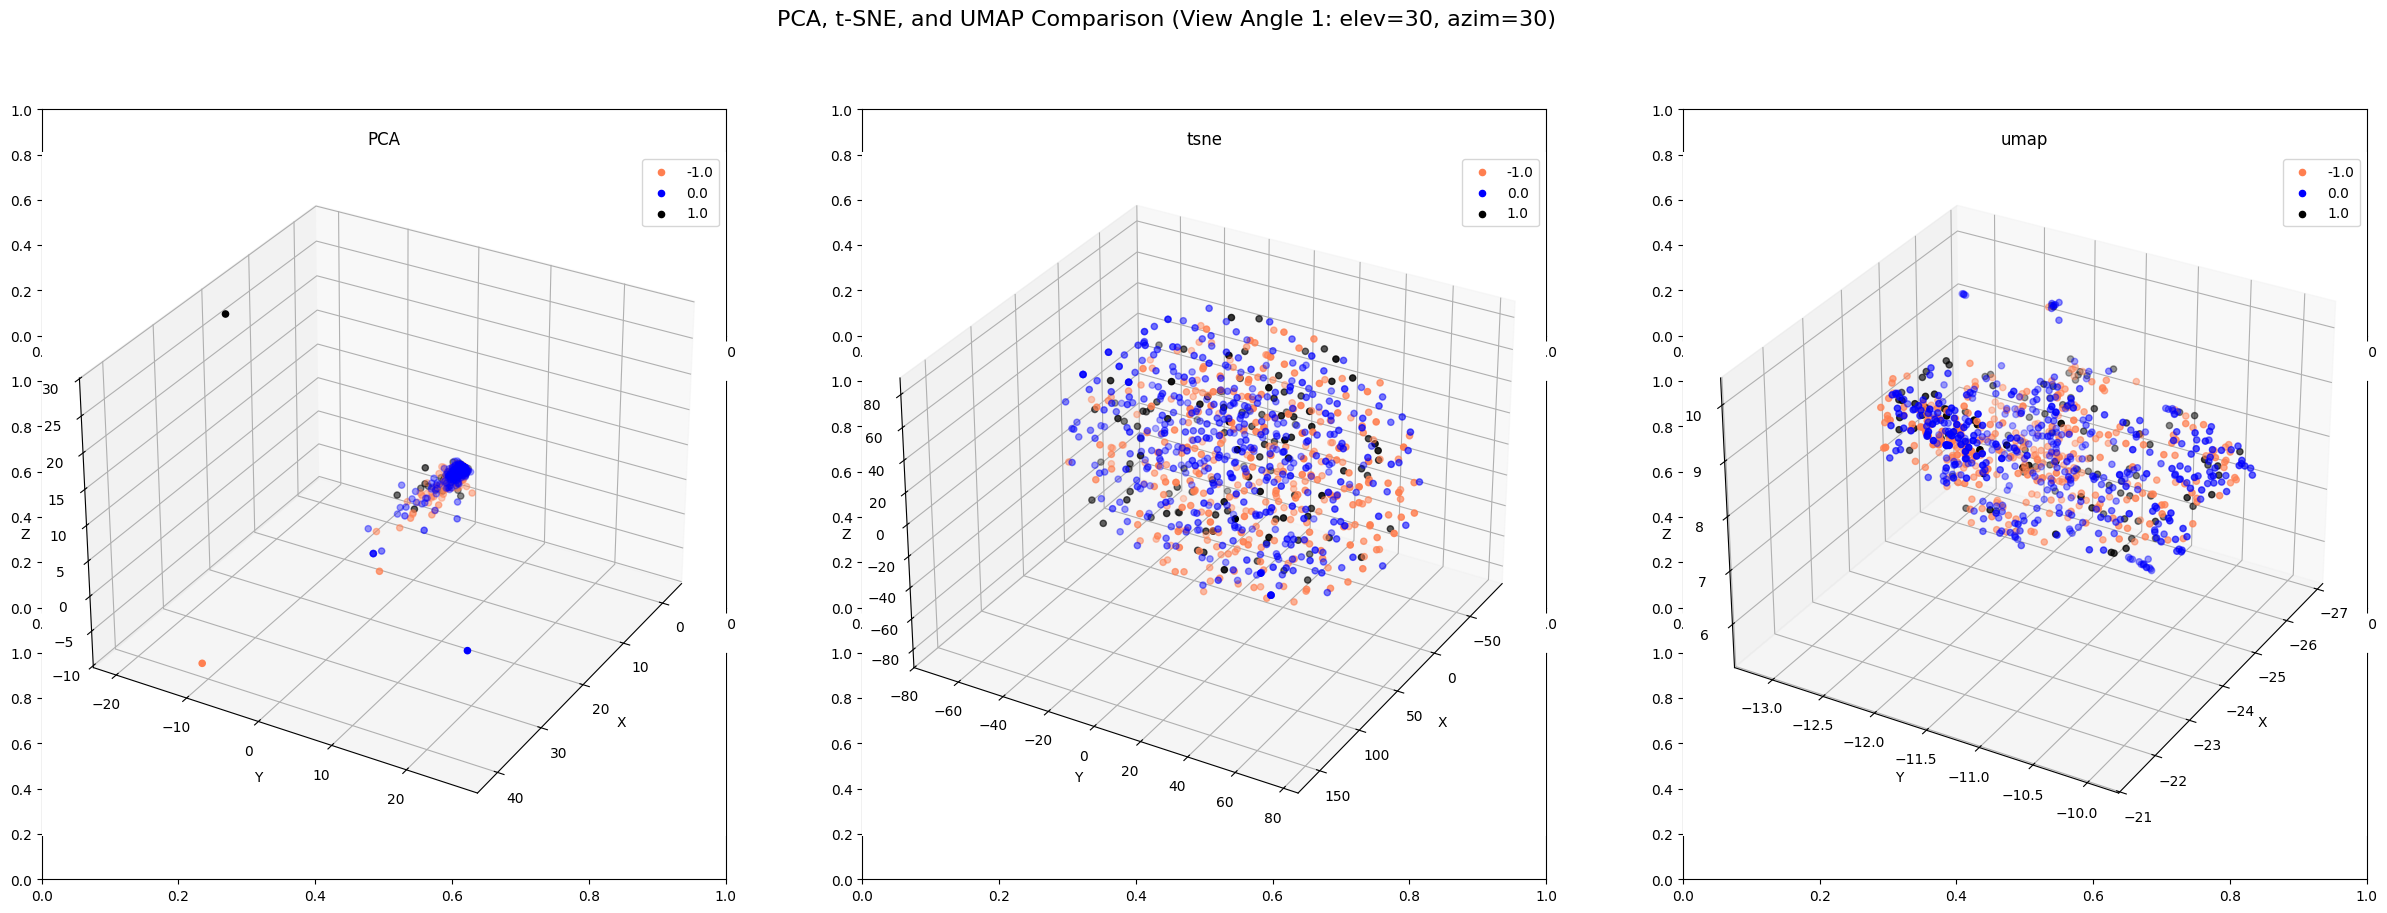

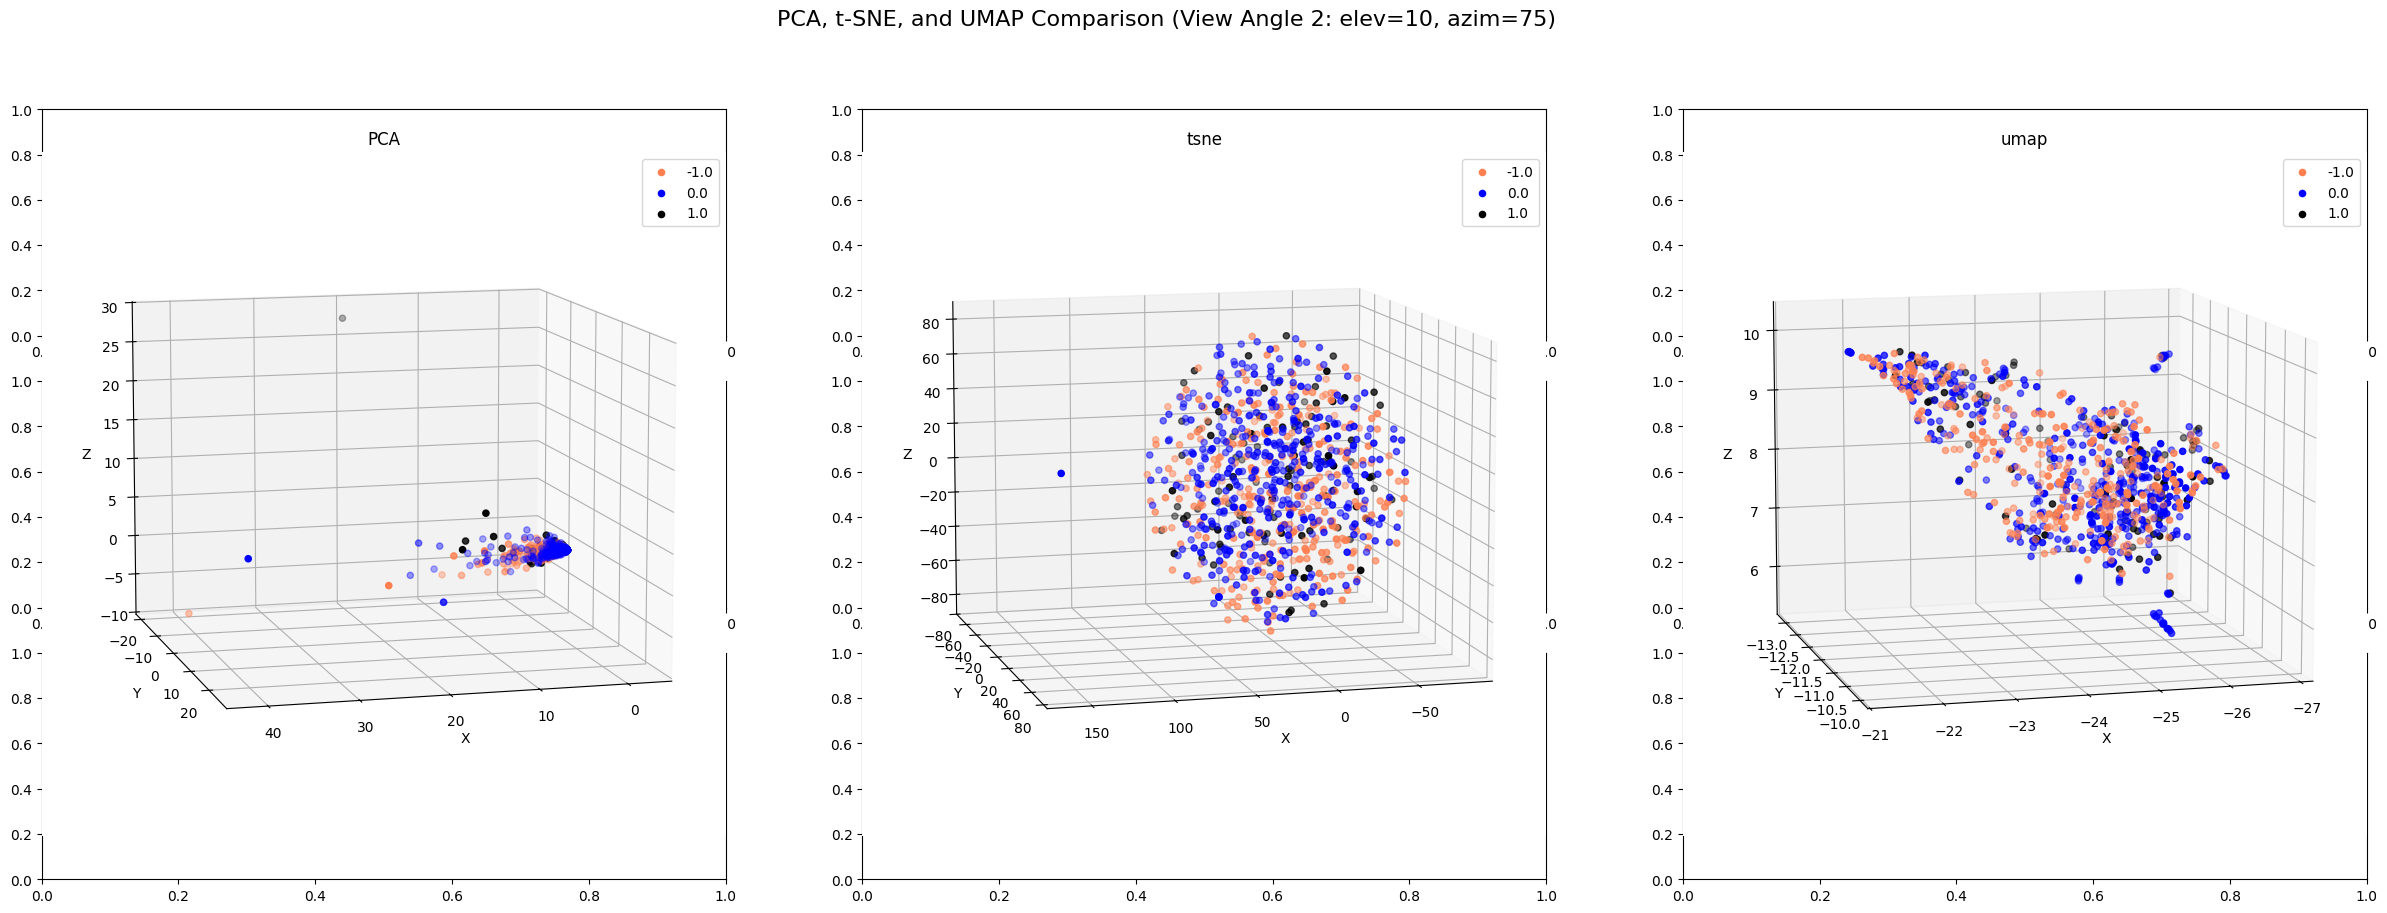

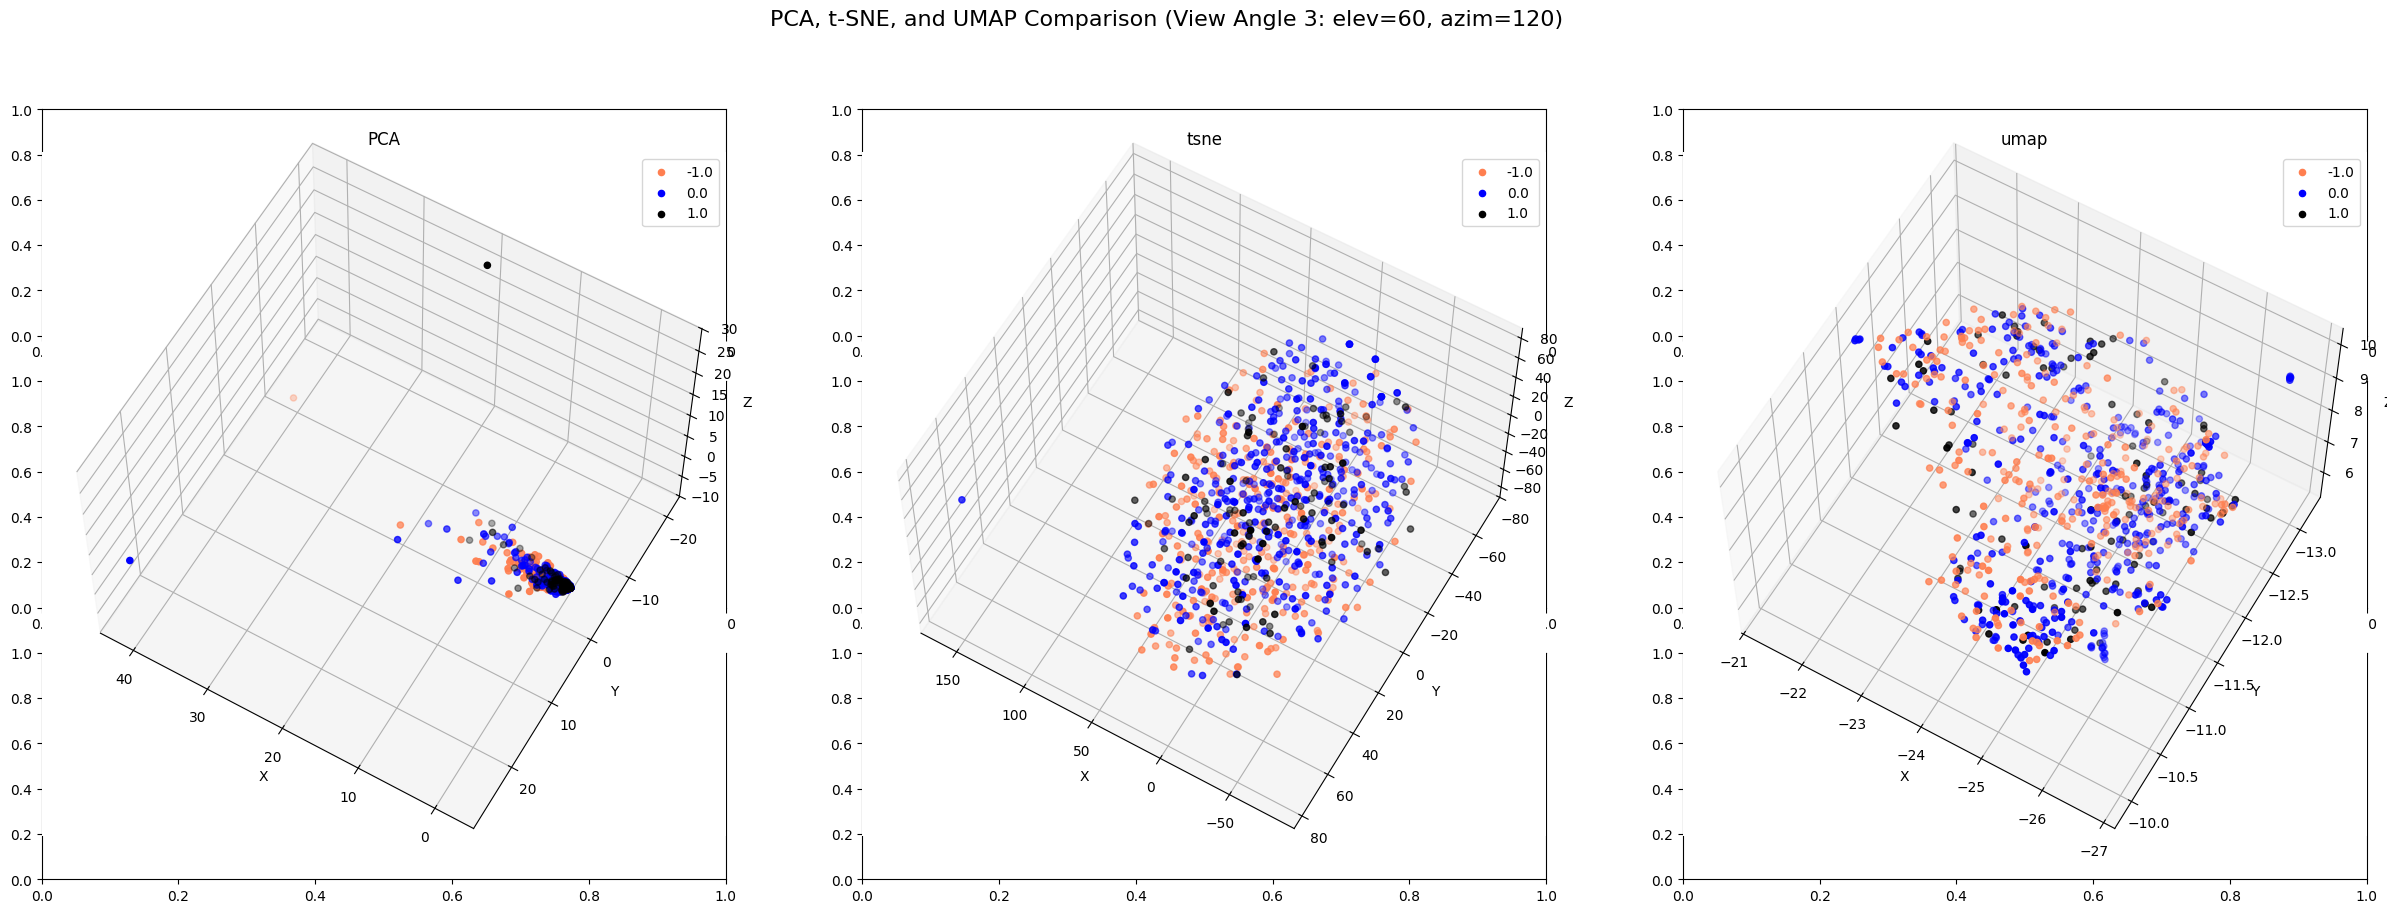

In [129]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

df_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = df['label'].unique() 



# Define a function to create a scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['label'] == category].T[0]
        ys = X_reduced[df['label'] == category].T[1]
        zs = X_reduced[df['label'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

angles = [(30,30),(10,75),(60,120)]
for i ,angle in enumerate(angles):
    fig, axes = plt.subplots(3, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
    fig.suptitle(f'PCA, t-SNE, and UMAP Comparison (View Angle {i+1}: elev={angle[0]}, azim={angle[1]})',fontsize=16)
    # create 3D subplot
    ax_pca = fig.add_subplot(131,projection='3d')
    ax_tsne = fig.add_subplot(132,projection='3d')
    ax_umap = fig.add_subplot(133,projection='3d')
    
    # Set the view angle for each subplot
    ax_pca.view_init(elev=angle[0], azim=angle[1])
    ax_tsne.view_init(elev=angle[0], azim=angle[1])
    ax_umap.view_init(elev=angle[0], azim=angle[1])
    
    # create scatter polts
    plot_scatter_3d(ax_pca, df_pca_aug, 'PCA')
    plot_scatter_3d(ax_tsne, df_tsne_aug, 'tsne')
    plot_scatter_3d(ax_umap, df_umap_aug, 'umap')
    
    plt.show()

### >>> Exercise 20

In [131]:
from sklearn.metrics.pairwise import cosine_similarity
document_to_transform_1 = []
random_record_1 = df.iloc[100]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[200]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(df)f" %{"df":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(df)f" %{"df":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(df)f" %{"df":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(df)f" %{"df":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(df)f" %{"df":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(df)f" %{"df":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.133631
Cosine Similarity using count bw 1 and 3: 0.142857
Cosine Similarity using count bw 2 and 3: 0.374166
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_26828\3167649385.py:32: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26828\3167649385.py:33: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26828\3167649385.py:34: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26828\3167649385.py:36: DeprecationWarning:

Conver

### >>> Exercise 21

In [132]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,digits=4))

Accuracy: 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5950    0.7347    0.6575        98
         0.0     0.6371    0.6529    0.6449       121
         1.0     0.1000    0.0278    0.0435        36

    accuracy                         0.5961       255
   macro avg     0.4440    0.4718    0.4486       255
weighted avg     0.5451    0.5961    0.5648       255



### >>> Exercise 24

In [133]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=4))

Decision Tree Accuracy (TDM): 0.5254901960784314

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5443    0.4388    0.4859        98
         0.0     0.5346    0.7025    0.6071       121
         1.0     0.3529    0.1667    0.2264        36

    accuracy                         0.5255       255
   macro avg     0.4773    0.4360    0.4398       255
weighted avg     0.5127    0.5255    0.5068       255

